In [37]:
import os
import pandas as pd
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
from pathlib import Path
import pingouin as pg

itemNameCols = [f"itemName{i}" for i in range(0,10)]
itemCols = [f"item{i}" for i in range(0,10)]


In [38]:
df = pd.read_csv("./dataframes/surveydata_participants.csv")
df.head()

,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,UserLanguage,consent,timing_consent_First Click,timing_consent_Last Click,...,SexP,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,StudentStatus,Employment status,ContinentOfBirth,ContinentOfResidence
0,2022-10-24 04:15:34,2022-10-24 04:20:30,100,295,True,2022-10-24 04:20:31,EN,"Yes, I understand the explanation provided to ...",13.998,13.998,...,Male,White,Poland,Poland,Poland,Polish,No,Part-Time,Europe,Europe
1,2022-10-24 04:15:43,2022-10-24 04:20:31,100,288,True,2022-10-24 04:20:33,EN,"Yes, I understand the explanation provided to ...",0.996,12.628,...,Female,White,Poland,Poland,Poland,Polish,No,Full-Time,Europe,Europe
2,2022-10-24 04:15:52,2022-10-24 04:20:38,100,285,True,2022-10-24 04:20:39,EN,"Yes, I understand the explanation provided to ...",5.905,8.771,...,Male,White,Italy,Italy,Italy,Italian,Yes,Other,Europe,Europe
3,2022-10-24 04:16:12,2022-10-24 04:21:23,100,310,True,2022-10-24 04:21:23,EN,"Yes, I understand the explanation provided to ...",26.298,33.000,...,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Other,Europe,Europe
4,2022-10-24 04:15:19,2022-10-24 04:21:53,100,393,True,2022-10-24 04:21:54,EN,"Yes, I understand the explanation provided to ...",6.241,7.295,...,Female,White,Poland,Poland,Poland,Polish,Yes,Part-Time,Europe,Europe


# Quick Stats Overview

In [39]:
len(df)

300

In [40]:
df["ContinentOfResidence"].value_counts()

Europe           50
Africa           50
North America    50
Asia             50
South America    50
Oceania          50
Name: ContinentOfResidence, dtype: int64

In [41]:
df.SexS.value_counts()

Female                       154
Male                         142
Non-binary / third gender      4
Name: SexS, dtype: int64

In [42]:
(df.TimeTaken.describe()/60).round(3)

count     5.000
mean     10.063
std       5.996
min       3.967
25%       6.562
50%       8.192
75%      11.600
max      57.217
Name: TimeTaken, dtype: float64

In [43]:
df.AgeS.describe().round(1)

count    300.0
mean      32.6
std       11.3
min       19.0
25%       24.8
50%       29.0
75%       38.0
max       73.0
Name: AgeS, dtype: float64

In [44]:
df['Employment status'].value_counts()

Full-Time                                                   175
Part-Time                                                    69
Other                                                        25
Not in paid work (e.g. homemaker', 'retired or disabled)     21
Due to start a new job within the next month                  8
DATA_EXPIRED                                                  2
Name: Employment status, dtype: int64

In [45]:
df['Ethnicity simplified'].value_counts()

White    156
Mixed     53
Black     46
Other     31
Asian     14
Name: Ethnicity simplified, dtype: int64

# Calculate ATI

In [46]:
mapATI = {np.nan:3, 'Completely Disagree': 1, 'Largely Disagree' : 2, 'Slightly Disagree' : 3, 'Slightly Agree': 4, 'Largely Agree' : 5, 'Completely Agree' : 6}
for i in range (1,10):
    df[f'ATI0{i}'] = df[f'ATI0{i}'].apply(lambda x: mapATI[x])
df["ATI03R"] = df.ATI03.apply(lambda x: 7-x)
df["ATI06R"] = df.ATI06.apply(lambda x: 7-x)
df["ATI08R"] = df.ATI08.apply(lambda x: 7-x)
df["ATI"] = (df.ATI01 + df.ATI02 + df.ATI03R + df.ATI04 + df.ATI05 + df.ATI06R + df.ATI07 + df.ATI08R + df.ATI09)/9
cronbach_alpha = np.round(pg.cronbach_alpha(data=df[['ATI01', 'ATI02','ATI03R', 'ATI04', 'ATI05', 'ATI06R', 'ATI07', 'ATI08R', 'ATI09']])[0],3)

In [47]:
print(f"ATI-mean: {df.ATI.mean()}, alpha: {cronbach_alpha}")

ATI-mean: 4.099259259259259, alpha: 0.885


# Create Itembased Dataframe 

In [48]:
data = []
for i, row in df.iterrows():
    # if i < 2: # skipping first to rows as no responses in there
    #     continue
    lstItemNames = dict(row[itemNameCols])
    lstItems = dict(row[itemCols])
    PID = row["PID"]
    if ((type(PID) == str)):
        # iterate through items to get responses
        items = list(lstItemNames.values())
        for j in range(1,11):
            new_row = {"PID": PID, "ContinentOfResidence" : row["ContinentOfResidence"]}
            new_row["Item"] =  lstItemNames[f'itemName{j-1}']
            new_row["ItemImage"] =  lstItems[f'item{j-1}']
            new_row["Self_Owning"] = row[f"{j}_using_self_owning"]
            new_row["Self_Familiar"] = row[f"{j}_using_self_familiar_1"]
            new_row["Self_Danger"] = row[f"{j}_using_self_1"]
            new_row["Other_Danger"] = row[f"{j}_using_other_1"]
            new_row["Robot_Danger"] = row[f"{j}_using_robot_1"]
            new_row["Self_Danger_Time"] = row[f'{j}_using_self_timing_Page Submit']
            new_row["Other_Danger_Time"] = row[f'{j}_using_other_timing_Page Submit']
            new_row["Robot_Danger_Time"] = row[f'{j}_using_robot_timing_Page Submit']
            data.append(new_row)
df_items = pd.DataFrame(data=data)
df_items.Item = df_items.Item.str.strip()
df_items["Self_Familiar"] = df_items["Self_Familiar"].astype(float)
df_items["Self_Danger"] = df_items["Self_Danger"].astype(float)
df_items["Other_Danger"] = df_items["Other_Danger"].astype(float)
df_items["Robot_Danger"] = df_items["Robot_Danger"].astype(float)


df_items["Self_Danger_Time"] = df_items["Self_Danger_Time"].astype(float)
df_items["Other_Danger_Time"] = df_items["Other_Danger_Time"].astype(float)
df_items["Robot_Danger_Time"] = df_items["Robot_Danger_Time"].astype(float)


C:\Users\ra38fep\AppData\Local\Temp\ipykernel_4700\2406544429.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_items.groupby("PID").mean().Self_Danger_Time.hist(range=(0,60), bins=30, alpha=.5)
C:\Users\ra38fep\AppData\Local\Temp\ipykernel_4700\2406544429.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_items.groupby("PID").mean().Other_Danger_Time.hist(range=(0,60), bins=30, alpha=.5)
C:\Users\ra38fep\AppData\Local\Temp\ipykernel_4700\2406544429.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False.

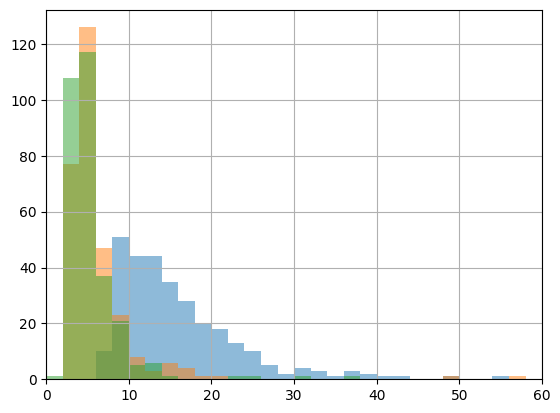

In [49]:
df_items.groupby("PID").mean().Self_Danger_Time.hist(range=(0,60), bins=30, alpha=.5)
df_items.groupby("PID").mean().Other_Danger_Time.hist(range=(0,60), bins=30, alpha=.5)
df_items.groupby("PID").mean().Robot_Danger_Time.hist(range=(0,60), bins=30, alpha=.5)
plt.xlim(0,60)
plt.show()

In [50]:
len(df_items)

3000

In [51]:
df_items.Self_Familiar = df_items.Self_Familiar.astype(int)
df_items.Self_Danger = df_items.Self_Danger.astype(int)
df_items.Other_Danger = df_items.Other_Danger.astype(int)
df_items.Robot_Danger = df_items.Robot_Danger.astype(int)

## Wide to Long (Tables needed for R-Analysis)

In [52]:
df.loc[df.cooking_frequency.isnull(), 'cooking_frequency'] = 0

In [53]:
df_items = df_items.rename(columns={'Self_Danger': 'Danger_Self', 'Other_Danger': 'Danger_Other', 'Robot_Danger':'Danger_Robot'})
dfX = pd.wide_to_long(df_items, stubnames="Danger", i=['PID', 'Item'], j='Perspective', sep='_', suffix=r'\w+').reset_index()[['PID', 'Item', 'Perspective', "Danger"]]
dfX = pd.merge(dfX, df_items[['PID', 'Item','Self_Owning', 'Self_Familiar']], on=['PID', 'Item'])
dfX = pd.merge(dfX, df[['PID', "ATI",'cooking_frequency', 'cooking_alone', 'cooking_together', 'cooking_expertise_1']], on=['PID'])
dfX = dfX.rename(columns={'cooking_frequency': 'CookingFrequency', 'cooking_alone': 'CookingAlone', 'cooking_together':'CookingTogether', 'cooking_expertise_1': 'CookingExpertise', "Self_Owning":"Owning", "Self_Familiar":"Familiar"})

# Export

In [54]:
df_items.to_csv("./dataframes/surveydata_items.csv", index=False)
dfX.to_csv("./dataframes/R_Danger.csv", index=False)